Missing values before cleaning:
Date               0
Game               0
Turkish_Support    0
Average_Players    0
Peak_Players       0
Review_Score       0
Price_USD          0
dtype: int64 

Missing values after cleaning:
Date               0
Game               0
Turkish_Support    0
Average_Players    0
Peak_Players       0
Review_Score       0
Price_USD          0
dtype: int64 



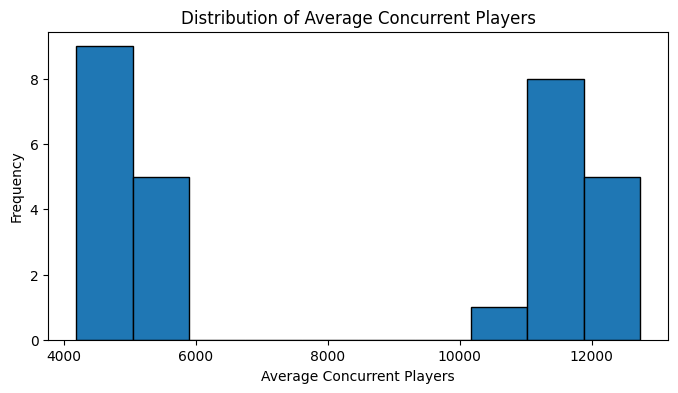

C:\Users\BuraK\AppData\Local\Temp\ipykernel_7040\2692438002.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


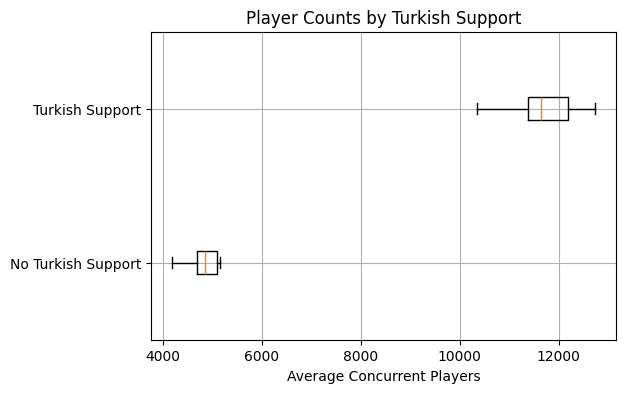

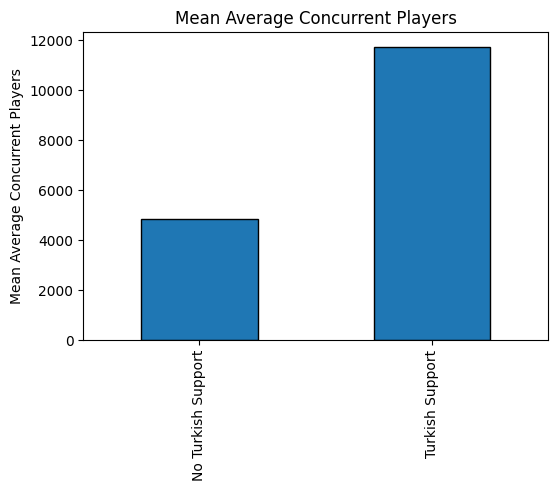

T-statistic: 38.42
P-value: 5.494828e-19

Mean Average Players:
No Turkish Support: 4849.06
Turkish Support:    11730.39


In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Read the Excel file
df = pd.read_excel('d210_data.xlsx')

# Rename columns for clarity
df.columns = [
    'Date', 'Game', 'Turkish_Support',
    'Average_Players', 'Peak_Players',
    'Review_Score', 'Price_USD'
]

# Data Cleaning
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("Missing values before cleaning:")
print(df.isnull().sum(), "\n")
df = df.dropna(subset=['Date', 'Game', 'Turkish_Support', 'Average_Players'])
df['Average_Players'] = pd.to_numeric(df['Average_Players'], errors='coerce')
df['Peak_Players'] = pd.to_numeric(df['Peak_Players'], errors='coerce')
df['Price_USD'] = pd.to_numeric(df['Price_USD'], errors='coerce')
df = df.dropna(subset=['Average_Players', 'Peak_Players', 'Price_USD'])

print("Missing values after cleaning:")
print(df.isnull().sum(), "\n")

# Label Turkish support as boolean
df['Is_Turkish_Supported'] = df['Turkish_Support'].str.lower().eq('yes')

# Histogram of Average Players
plt.figure(figsize=(8, 4))
plt.hist(df['Average_Players'], bins=10, edgecolor='black')
plt.title("Distribution of Average Concurrent Players")
plt.xlabel("Average Concurrent Players")
plt.ylabel("Frequency")
plt.show()

# Boxplot comparing groups
turkish = df[df['Is_Turkish_Supported']]['Average_Players']
non_turkish = df[~df['Is_Turkish_Supported']]['Average_Players']

fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(
    [non_turkish, turkish],
    vert=False,
    labels=['No Turkish Support', 'Turkish Support']
)
ax.set_xlabel("Average Concurrent Players")
ax.set_title("Player Counts by Turkish Support")
ax.grid(True)
plt.show()

# Bar chart of mean values
means = df.groupby('Is_Turkish_Supported')['Average_Players'].mean()
means.index = ['No Turkish Support', 'Turkish Support']
means.plot(kind='bar', figsize=(6, 4), edgecolor='black')
plt.title("Mean Average Concurrent Players")
plt.ylabel("Mean Average Concurrent Players")
plt.show()

# Hypothesis testing
t_stat, p_val = ttest_ind(turkish, non_turkish, equal_var=False)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.6e}")

# Print group means
print("\nMean Average Players:")
print(f"No Turkish Support: {non_turkish.mean():.2f}")
print(f"Turkish Support:    {turkish.mean():.2f}")
     